# Signaux élémentaires

Différents signaux seront régulièrement utilisés dans le cours : ils sont définis ici.
La plupart peuvent être définis à temps continu ou à temps discret.

## Sinusoïde

En temps continu, la sinusoïde a pour expression :

$$
  x(t) = A \sin(2 \pi f t + \varphi)
$$

dont les [paramètres](https://vincmazet.github.io/spetsi/sinus.html) sont :
* $A$ est l'_amplitude_,
* $f$ est la _fréquence_,
* $\varphi$ est la _phase_.
  Remarquez que si $\varphi=0$, alors $x(t)$ est un sinus,
  et si $\varphi=\pi/2$, alors $x(t)$ est un cosinus.

La sinusoïde en temps continu est [périodique](https://fr.wikipedia.org/wiki/Fonction_p%C3%A9riodique) de période $1/f$ ou, de manière équivalente, de fréquence $f$.

En temps discret, la sinusoïde a la même expression :

$$
  x[n] = A \sin(2 \pi f n + \varphi)
$$

Le sinus est créé en Python avec la fonction [`numpy.sin`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html).

```{figure} sinusoide.svg
---
width: 700px
name: F:sinusoide
---
```

## Exponentielle complexe

En temps continu, l'exponentielle complexe a pour expression :

$$
  x(t) = \exp(j 2 \pi f t + \varphi)
       = \cos(2 \pi f t + \varphi) + j \sin(2 \pi f t + \varphi)
$$

En temps discret, c'est la même expression (en remplaçant les parenthèses dans $x(t)$ par des crochets). L'exponentielle est créée en Python avec la fonction [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html),
et le nombre complexe $j$ est obtenu avec `1j`.

À cause du nombre complexe $j$, le signal est à valeurs complexes.
Pour le représenter, il faut être dans un espace à trois dimensions (la variable, la partie réelle et la partie imaginaire).
De cette manière, l'exponentielle complexe ressemble à une queue de cochon, ou un tire-bouchon.
Remarquez que la variable $f$, souvent appelée fréquence, peut tout à fait être négative : dans ce cas, l'exponentielle complexe tourne dans le sens inverse.

```{figure} expo.svg
---
name: F:expo
---
```

[**Animation** : exponentielle complexe](https://vincmazet.github.io/spetsi/expo.html)

<div id="expo" class="spetsi mathjax_process"></div>
<script src="https://vincmazet.github.io/spetsi/js/spetsi.js" type="text/javascript"></script>
<script src="https://vincmazet.github.io/spetsi/js/three.js"></script>
<script src="https://vincmazet.github.io/spetsi/js/expo.js" type="text/javascript"></script>

## Sinus cardinal

Le sinus cardinal, noté $\mathrm{sinc}$, a pour définition (le cas où $t=0$ est à considérer à part puisque la division par $t=0$ n'est pas possible) :

$$
  \mathrm{sinc}(t) =
  \begin{cases}
    \displaystyle \frac{\sin(\pi t)}{\pi t} &\text{si}\quad t \neq 0 \\
    1 &\text{si}\quad t = 0
  \end{cases}
$$

Un sinus cardinal ressemble à un cosinus donc l'amplitude décroît lorsqu'on s'éloigne de $t=0$.

Encore une fois, le sinus cardinal à temps discret a la même expression (avec des crochets à la place des parenthèses).
Le sinus cardinal est obtenu en Python avec la fonction [`numpy.sinc`](https://numpy.org/doc/stable/reference/generated/numpy.sinc.html).

```{figure} sinc.svg
---
width: 700px
name: F:sinc
---
```


## Échelon

L'échelon (également appelé fonction de Heaviside) a pour définition :

$$
  u(t) =
  \begin{cases}
    0 &\text{si}\quad t < 0 \\
    1 &\text{si}\quad t \geq 0
  \end{cases}
$$

L'échelon est donc nul pour $t<0$ et égal à 1 sinon.
Il existe aussi une version à temps discret.

```{figure} echelon.svg
---
width: 700px
name: F:echelon
---
```

Il n'existe pas de fonction permettant de générer un échelon en Python : il faut passer par des instructions spécifiques, comme par exemple dans le code suivant :

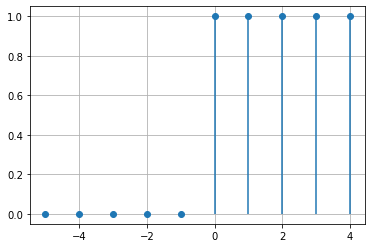

In [2]:
# Modules à importer
import numpy as np
import matplotlib.pyplot as plt

# Tout d'abord, générer la liste des instants d'échantillonnage
# Par exemple ici : 11 échantillons répartis entre -5 et 4
n = np.arange(-5, 5)

# L'échelon est obtenu avec la fonction numpy.where
# qui affecte la valeur 1 ou 0 suivant la condition
u = np.where(n>=0, 1, 0)

# Affichage
plt.stem(n, u, basefmt=" ")
plt.grid()
plt.show()

## Porte

La porte (ou fonction rectangle) a pour définition :

$$
  \mathrm{rect}(t) =
  \begin{cases}
    0 &\text{si}\quad |t| > \frac{1}{2} \\
    1 &\text{si}\quad |t| \leq \frac{1}{2}
  \end{cases}
$$

Cette porte est de longueur 1 et centrée sur 0.

```{figure} porte.svg
---
width: 700px
name: F:porte
---
```

````{dropdown} Prélèvement d'un signal
La porte est très utile pour exprimer mathématiquement le « prélèvement » d'une portion d'un signal :
on parle de « fenêtrage ».
Ainsi, la portion de largeur $T$ centrée autour de $t_0$ d'un signal $x(t)$ s'exprime :

$$
  \tilde{x}(t) = x(t) \times \mathrm{rect}\left(\frac{t-t_0}{T}\right).
$$

```{figure} fenetre.svg
---
width: 700px
name: F:fenetre
---
Fenêtrage du signal $x$ par une porte de largeur $T$ et centrée autour de $t_0$.
```

````

Comme pour l'échelon, la porte peut être définie en Python avec la fonction [`numpy.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html).
Par exemple, l'illustration ci-dessous est une porte discrète centrée sur 2 et de longueur 7 :

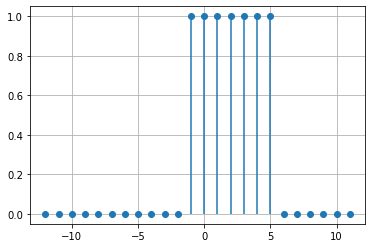

In [7]:
# Porte définie entre -5 et 10,
# représentée entre -12 et 12
n = np.arange(-12, 12)
r = np.where( (n>=-1) & (n<=5) , 1, 0)
plt.stem(n, r, basefmt=" ")
plt.grid()
plt.show()

## Impulsion de Dirac

L'impulsion de Dirac est telle que :

$$
  \delta(t) = 0 \;\text{si}\; t \neq 0
  \qquad\text{et}\qquad
  \int \delta(t) dt = 1
$$

L'impulsion de Dirac n'est pas une fonction, au sens mathématique, car $\delta(0)$ n'est pas défini : c'est en fait une distribution.
Pour cette raison, on représente ce signal par une flèche, qui signifie que la valeur n'est pas définie en 0.

```{figure} dirac.svg
---
width: 700px
name: F:dirac
---
```

C'est un signal non représentable physiquement car il n'existe pas dans la nature.
Mais c'est une conceptualisation mathématique bien pratique.
Un exemple réaliste qui s'en approcherait serait le son produit lorsqu'on tape d'un coup bref dans ses mains.
On peut l'approcher par une porte dont la largeur tend vers 0 et l'amplitude vers l'infini.

L'impulsion de Dirac a des propriétés particulières, notamment :
* $f(t) \delta(t) = f(0) \delta(t)$
* $f(t) \delta(t-\tau) = f(\tau) \delta(t-\tau)$

De la dernière propriété découle la suivante :

$$
  \int f(t) \delta(t-\tau) dt = \int f(\tau) \delta(t-\tau) dt
  = f(\tau) \int \delta(t-\tau) dt = f(\tau).
$$

À l'inverse des signaux précédents, l'impulsion de Dirac ne peut pas s'écrire en temps discret.
Il existe cependant un signal qui s'en approche : l'[impulsion discrète](C:signaux-elementaires:kronecker).

(C:signaux-elementaires:kronecker)=
## Impulsion discrète

L'impulsion discrète est l'équivalent à temps discret de l'impulsion de Dirac. C'est une fonction mathématique classique car elle est définie en tout point :

$$
  \delta[n] =
  \begin{cases}
      0 \;\text{si}\; n \neq 0 \\
      1 \;\text{si}\; n = 0
  \end{cases}
$$

L'impulsion discrète est également appelée impulsion de Kronecker.

La fonction `numpy.where` peut encore être utilisée pour définir une impulsion discrète en Python :

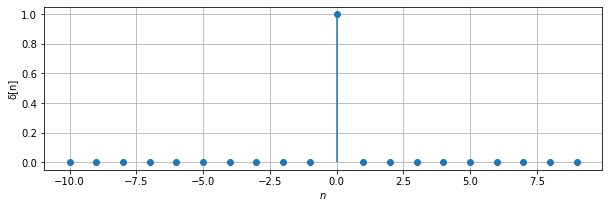

In [6]:
n = np.arange(-10, 10)
d = np.where(n==0, 1, 0)

plt.figure(figsize=(10,3))
plt.stem(n, d, basefmt=" ")
plt.xlabel("$n$")
plt.ylabel("δ[n]")
plt.grid()
plt.show()

## Peigne de Dirac

Le peigne de Dirac est défini par ($T > 0$) :

$$
  Ш_T(t) = \sum_{k=-\infty}^{+\infty} \delta(t-kT)
$$

Le peigne de Dirac est également appelé train d'impulsion, fonction d'échantillonnage ou distribution Cha (en raison de sa ressemblance avec la lettre cyrillique Ш).

```{figure} peigne.svg
---
width: 700px
name: F:peigne
---
```

✏️ [](S:elementaire:exo:representation)